In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [16]:
titanic = pd.read_csv("train.csv", index_col=0)
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S


In [18]:
# Y is the target variable
y = titanic['Survived']
# X is the feature set which includes
X = titanic[['Fare','Pclass']]

In [28]:
type(X.index)

pandas.core.indexes.numeric.Int64Index

In [20]:
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Number of data points in training set:  {}  ".format(len(X_train)))
print("Number of targets in training set    :  {}\n".format(len(y_train)))

print("Number of data points in test set    :  {}  ".format(len(X_test)))
print("Number of targets in test set        :  {}  ".format(len(y_test)))

Number of data points in training set:  712  
Number of targets in training set    :  712

Number of data points in test set    :  179  
Number of targets in test set        :  179  


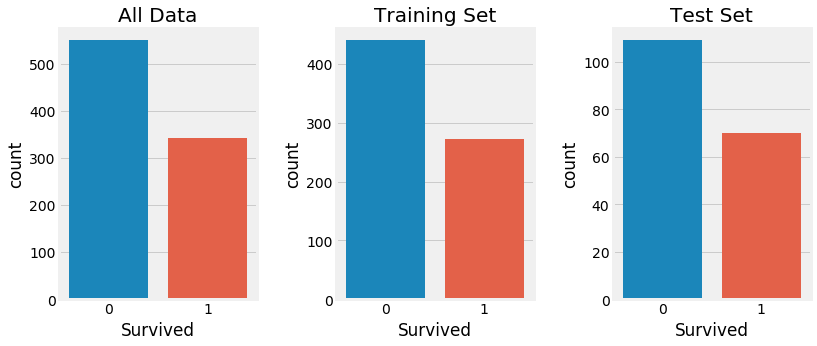

Proportion of '0' in all data     : %62 
Proportion of '0' in training set : %62 
Proportion of '0' in test set     : %61 


In [21]:
plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
plt.subplots_adjust(wspace=0.4)

plt.subplot(131)
sns.countplot(y)
plt.title("All Data")

plt.subplot(132)
sns.countplot(y_train)
plt.title("Training Set")

plt.subplot(133)
sns.countplot(y_test)
plt.title("Test Set")

plt.show()

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

Proportion of '0' in all data     : %62 
Proportion of '0' in training set : %62 
Proportion of '0' in test set     : %61 


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

model.score(X_test, y_test)

0.659217877094972

In [24]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1111)

In [25]:
pieces = kf.split(X)

for num, (train_index, test_index) in enumerate(pieces):
    print("No.{} Train set size : {}".format(num+1,len(train_index)))
    print("No.{} Test set size     : {}".format(num+1,len(test_index)))
    print('-'*28, "\n")

No.1 Train set size : 712
No.1 Test set size     : 179
---------------------------- 

No.2 Train set size : 713
No.2 Test set size     : 178
---------------------------- 

No.3 Train set size : 713
No.3 Test set size     : 178
---------------------------- 

No.4 Train set size : 713
No.4 Test set size     : 178
---------------------------- 

No.5 Train set size : 713
No.5 Test set size     : 178
---------------------------- 



In [30]:
from sklearn.metrics import mean_squared_error

model2 = LogisticRegression()

pieces = kf.split(X)
score_list = []

for i, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, y_train = X.iloc[train_indeks], y.iloc[train_indeks]
    X_test, y_test = X.iloc[test_indeks], y.iloc[test_indeks]
    
    model2.fit(X_train, y_train)
    
    prediction = model2.predict(X_test)
    
    score = model.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23, "\n")

Piece No.1 score: 0.715
----------------------- 

Piece No.2 score: 0.708
----------------------- 

Piece No.3 score: 0.685
----------------------- 

Piece No.4 score: 0.607
----------------------- 

Piece No.5 score: 0.680
----------------------- 



In [31]:
print("Mean score : {:.2f}".format(np.mean(score_list)))

Mean score : 0.68


In [32]:
from sklearn.model_selection import cross_validate, cross_val_score

In [33]:
log_reg_model = LogisticRegression()

cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                   )

print('Train Scores :', cv['train_score'], sep = '\n')
print("-"*50)
print('Test Scores     :', cv['test_score'], sep = '\n')

Train Scores :
[0.68913858 0.68578554 0.67830424 0.680798   0.67705736 0.68204489
 0.67581047 0.67331671 0.67581047 0.67206983]
--------------------------------------------------
Test Scores     :
[0.58888889 0.61797753 0.68539326 0.66292135 0.69662921 0.65168539
 0.70786517 0.73033708 0.70786517 0.74157303]


In [34]:
print('Mean score of train set : ', cv['train_score'].mean())
print('Mean score of test set  : ', cv['test_score'].mean())

Mean score of train set :  0.679013608301344
Mean score of test set  :  0.6791136079900124


In [35]:
cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                    scoring = ['accuracy', 'precision', 'r2']
                   )

In [36]:
print('Train Set Mean Accuracy  : {:.2f}  '.format(cv['train_accuracy'].mean()))
print('Train Set Mean R-square  : {:.2f}  '.format(cv['train_r2'].mean()))
print('Train Set Mean Precision : {:.2f}\n'.format(cv['train_precision'].mean()))

print('Test Set Mean Accuracy   : {:.2f}  '.format(cv['test_accuracy'].mean()))
print('Test Set Mean R-square   : {:.2f}  '.format(cv['test_r2'].mean()))
print('Test Set Mean Precision  : {:.2f}  '.format(cv['test_precision'].mean()))

Train Set Mean Accuracy  : 0.68  
Train Set Mean R-square  : -0.36  
Train Set Mean Precision : 0.63

Test Set Mean Accuracy   : 0.68  
Test Set Mean R-square   : -0.36  
Test Set Mean Precision  : 0.63  


In [37]:
cv = cross_val_score(estimator=log_reg_model,
                     X=X,
                     y=y,
                     cv=10,
                    )

print('Model Scores : ', cv, sep = '\n')

Model Scores : 
[0.58888889 0.61797753 0.68539326 0.66292135 0.69662921 0.65168539
 0.70786517 0.73033708 0.70786517 0.74157303]


In [38]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(estimator=log_reg_model,
                           X=X,
                           y=y,
                           cv=10,
                          )
print(y_pred[0:10])

[0 1 0 1 0 0 1 0 0 0]


In [39]:
log_reg = LogisticRegression()

print(log_reg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [40]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [41]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [42]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 0.01, 'penalty': 'l2'}
Best Score      :  0.6791385767790261


In [43]:
import pandas as pd

results = grid_cv.cv_results_

df = pd.DataFrame(results)
display(df.head().iloc[:,:6])
df.info()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty
0,0.002,0.000,0.000,0.000,0.000,l1
1,0.013,0.004,0.003,0.001,0.000,l2
2,0.001,0.000,0.000,0.000,0.000,l1
3,0.013,0.005,0.002,0.001,0.000,l2
4,0.001,0.000,0.000,0.000,0.001,l1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      20 non-null     float64
 1   std_fit_time       20 non-null     float64
 2   mean_score_time    20 non-null     float64
 3   std_score_time     20 non-null     float64
 4   param_C            20 non-null     object 
 5   param_penalty      20 non-null     object 
 6   params             20 non-null     object 
 7   split0_test_score  10 non-null     float64
 8   split1_test_score  10 non-null     float64
 9   split2_test_score  10 non-null     float64
 10  split3_test_score  10 non-null     float64
 11  split4_test_score  10 non-null     float64
 12  split5_test_score  10 non-null     float64
 13  split6_test_score  10 non-null     float64
 14  split7_test_score  10 non-null     float64
 15  split8_test_score  10 non-null     float64
 16  split9_test_score  10 non-nu

In [44]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
7,l2,0.010,0.679
11,l2,1,0.679
13,l2,10,0.679
15,l2,100,0.679
17,l2,1000,0.679
19,l2,10000,0.679
9,l2,0.100,0.677
5,l2,0.001,0.667
1,l2,0.000,0.666
3,l2,0.000,0.661


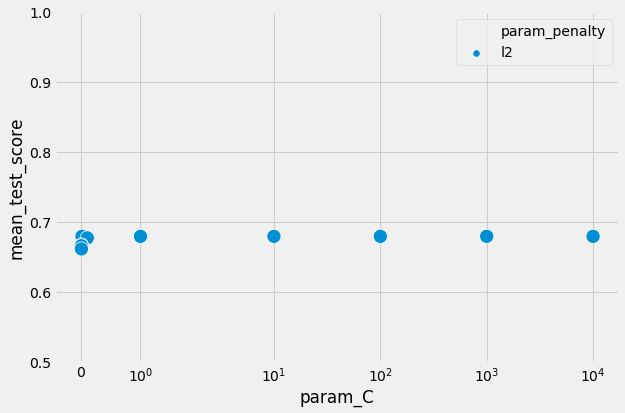

In [51]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=200)
plt.xscale('symlog')
plt.ylim((0.5,1))

plt.show()

In [46]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [47]:
from sklearn.model_selection import RandomizedSearchCV

rs_cv = RandomizedSearchCV(estimator=log_reg,
                           param_distributions = parameters,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )

rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [48]:
print("Best parameters      : ", rs_cv.best_params_, "\n")
print("All precision values : ", rs_cv.cv_results_['mean_test_score'], "\n")
print("Best precision value : ", rs_cv.best_score_)

Best parameters      :  {'penalty': 'l2', 'C': 0.001} 

All precision values :  [0.65987691 0.68922201 0.62998217 0.62998217        nan 0.62998217
        nan        nan        nan        nan] 

Best precision value :  0.6892220060641113


In [49]:
results_rs = rs_cv.cv_results_

df_rs = pd.DataFrame(results_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)

df_rs

,param_penalty,param_C,mean_test_score
1,l2,0.001,0.689
0,l2,0.000,0.660
2,l2,10,0.630
3,l2,1,0.630
5,l2,1000,0.630
4,l1,100,nan
6,l1,0.010,nan
7,l1,0.001,nan
8,l1,1000,nan
9,l1,0.000,nan


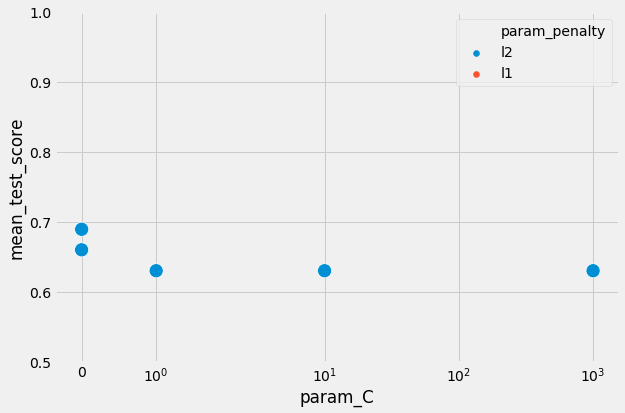

In [52]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.5,1))

plt.show()

In [ ]:
# parameters c=1000 gives us the best tuning